In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_pollution = pd.read_csv('global air pollution dataset.csv')

In [9]:
%pip install mysql-connector-python
%pip install pymysql
%pip install sqlalchemy
%pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import mysql.connector as connector

In [7]:
conn= connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='Enviro_Scan',
)
df_pollution = pd.read_csv('global air pollution dataset.csv')
df_pollution.head()


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [10]:
df_pollution.shape

(23463, 12)

In [8]:
df_pollution.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [12]:
df_pollution.isnull()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,False,False,False,False,False,False,False,False,False,False,False,False
23459,False,False,False,False,False,False,False,False,False,False,False,False
23460,False,False,False,False,False,False,False,False,False,False,False,False
23461,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df_pollution.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [10]:
df_pollution.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
23458    0
23459    0
23460    0
23461    0
23462    0
Length: 23463, dtype: int64

In [11]:
df_pollution.isnull().sum().sum()

np.int64(428)

In [12]:
df_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


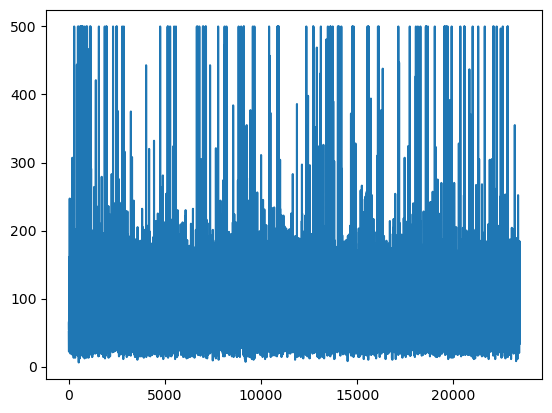

In [13]:
import matplotlib.pyplot as plt 
df_pollution['AQI Value'].plot(kind='line')
plt.show()

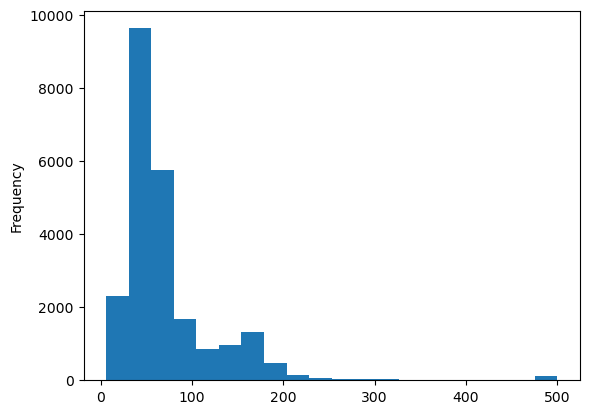

In [14]:
df_pollution['AQI Value'].plot(kind='hist', bins=20)
plt.show()

In [19]:
import seaborn as sns
import plotly.express as px
print("\nSummary Statistics:\n", df_pollution.describe(include="all"))


Summary Statistics:
                          Country    City     AQI Value AQI Category  \
count                      23036   23462  23463.000000        23463   
unique                       175   23462           NaN            6   
top     United States of America  Marang           NaN         Good   
freq                        2872       1           NaN         9936   
mean                         NaN     NaN     72.010868          NaN   
std                          NaN     NaN     56.055220          NaN   
min                          NaN     NaN      6.000000          NaN   
25%                          NaN     NaN     39.000000          NaN   
50%                          NaN     NaN     55.000000          NaN   
75%                          NaN     NaN     79.000000          NaN   
max                          NaN     NaN    500.000000          NaN   

        CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
count   23463.000000           23463     23463.00

In [22]:
print("\nMissing Values:\n", df_pollution.isnull().sum())


Missing Values:
 Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


In [21]:
print("\nDuplicate Rows:", df_pollution.duplicated().sum())


Duplicate Rows: 0


In [28]:
# Select only numeric columns
numeric_df = df_pollution.select_dtypes(include=["int64", "float64"])

# Compute quartiles and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Outlier detection only on numeric data
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("\nPotential Outliers per Column:\n", outliers)



Potential Outliers per Column:
 AQI Value          2935
CO AQI Value       8596
Ozone AQI Value    1513
NO2 AQI Value      1681
PM2.5 AQI Value    2641
dtype: int64


In [30]:
df = df_pollution.dropna()              # drop rows with any missing values
df = df_pollution.dropna(axis=1)        # drop columns with missing values

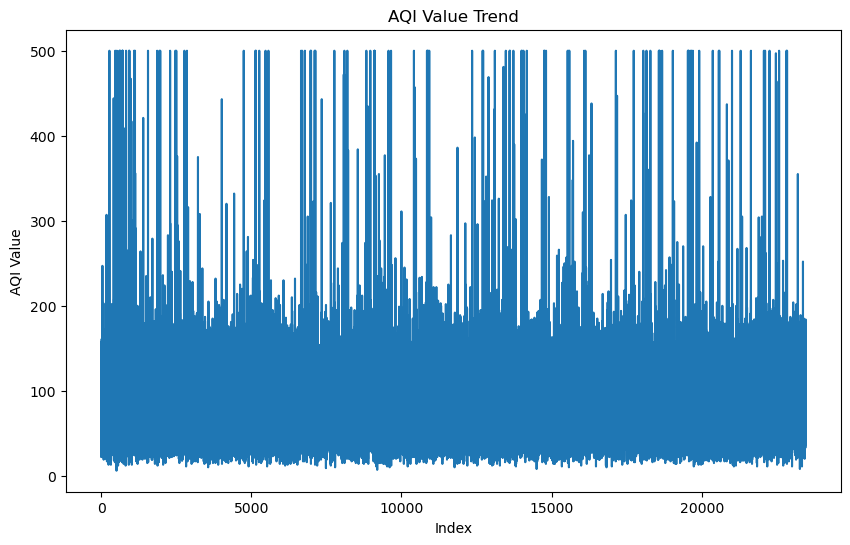

In [33]:
plt.figure(figsize=(10,6))
df['AQI Value'].plot(kind='line')
plt.title("AQI Value Trend")
plt.xlabel("Index")
plt.ylabel("AQI Value")
plt.show()


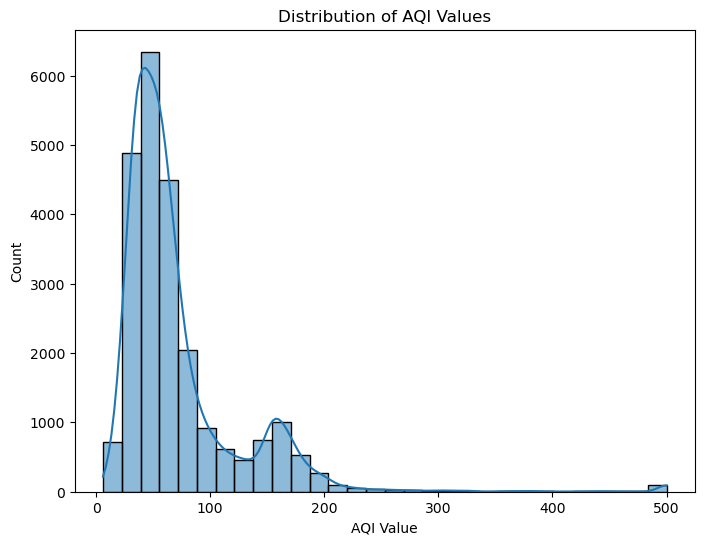

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(df['AQI Value'], bins=30, kde=True)
plt.title("Distribution of AQI Values")
plt.show()

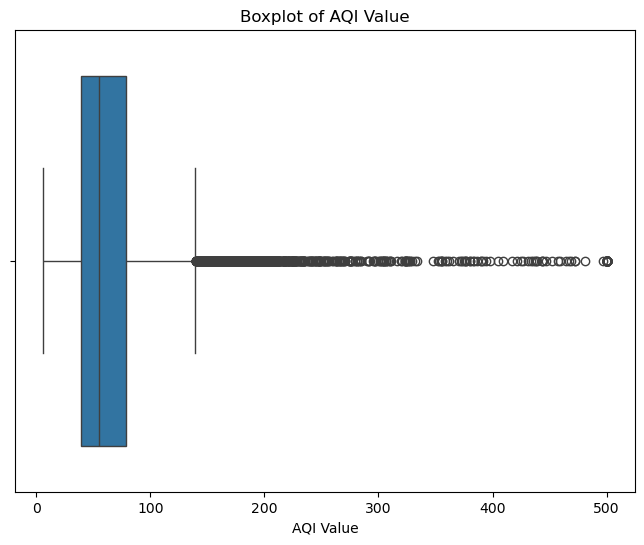

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['AQI Value'])
plt.title("Boxplot of AQI Value")
plt.show()


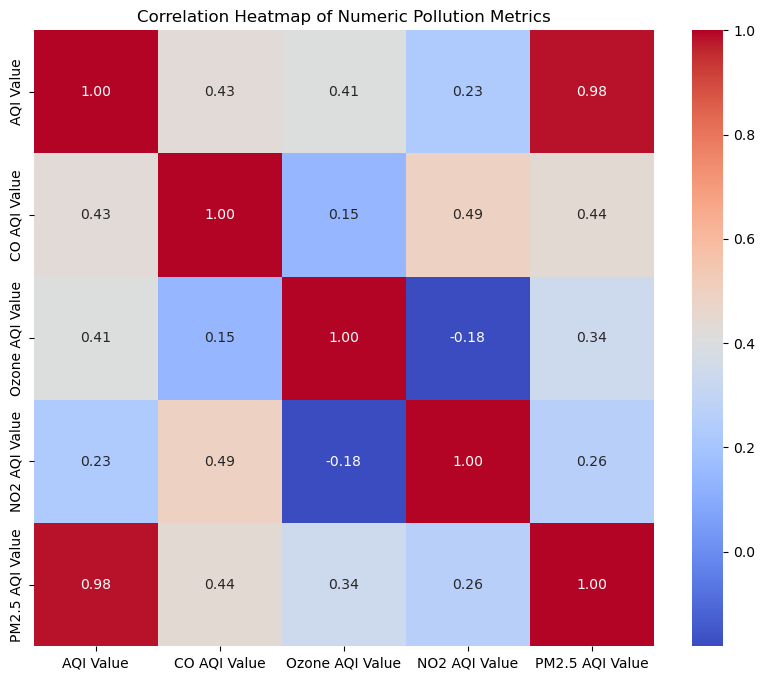

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Pollution Metrics")
plt.show()


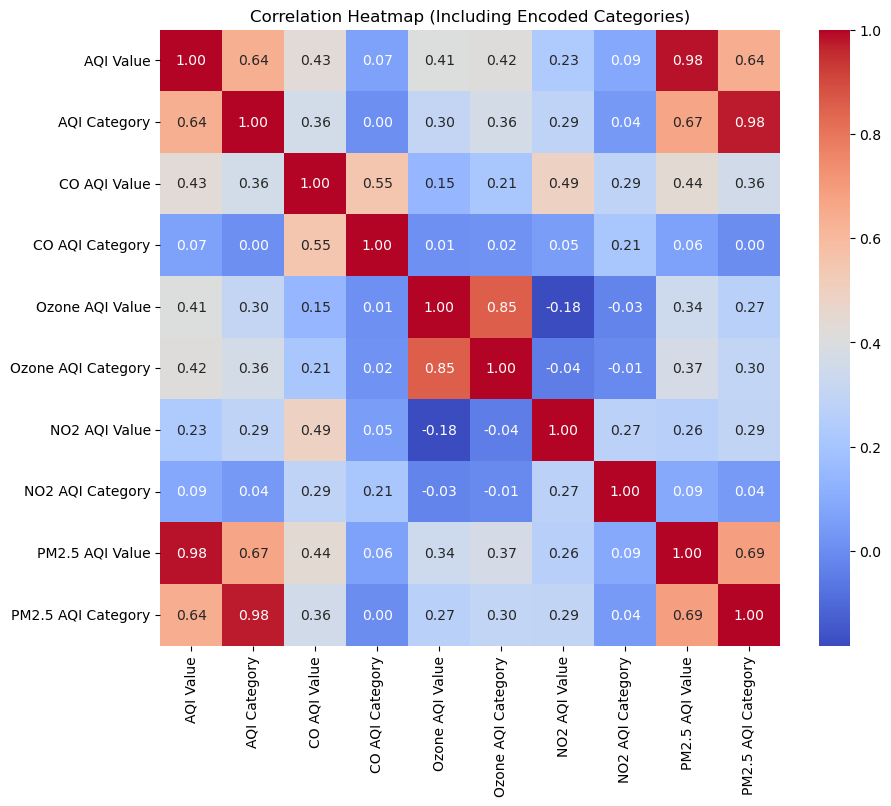

In [38]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Including Encoded Categories)")
plt.show()

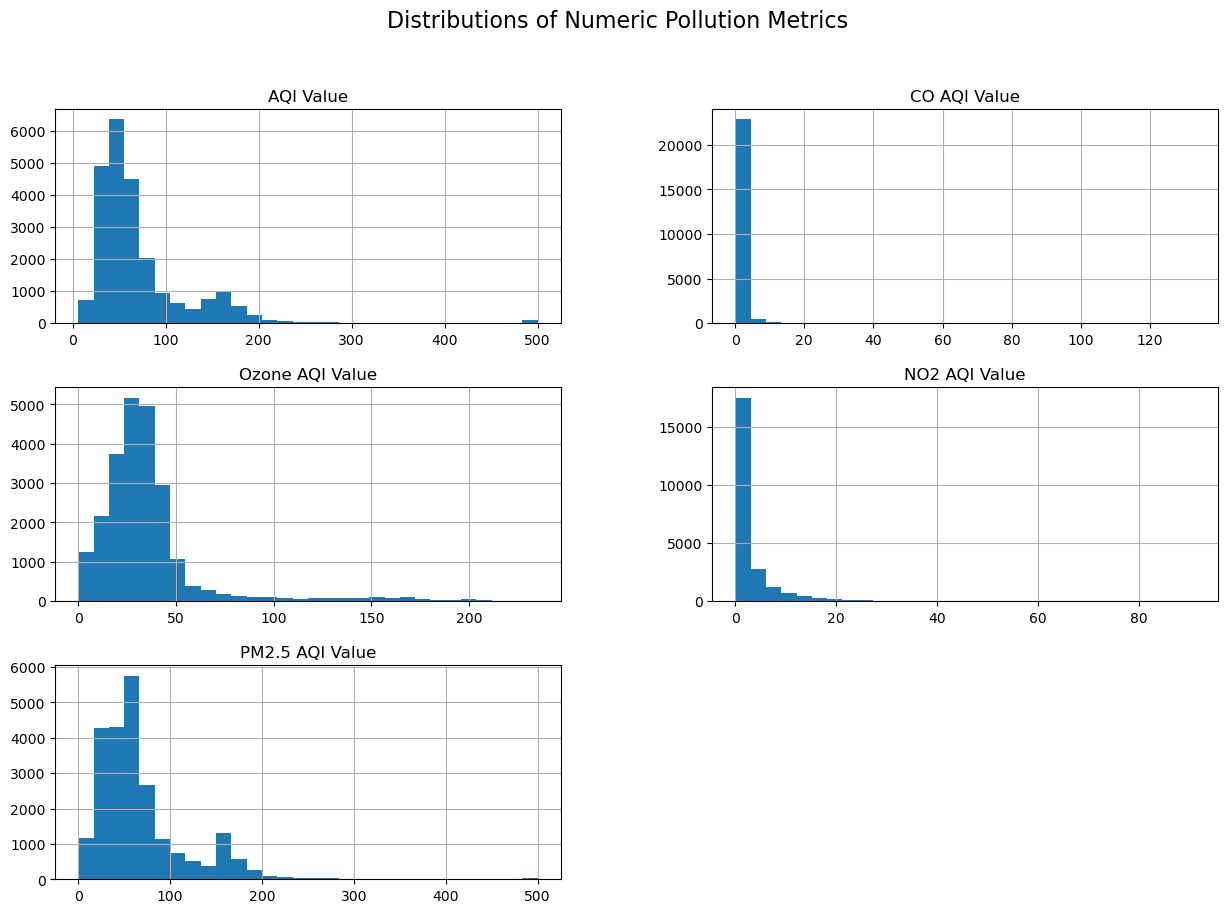

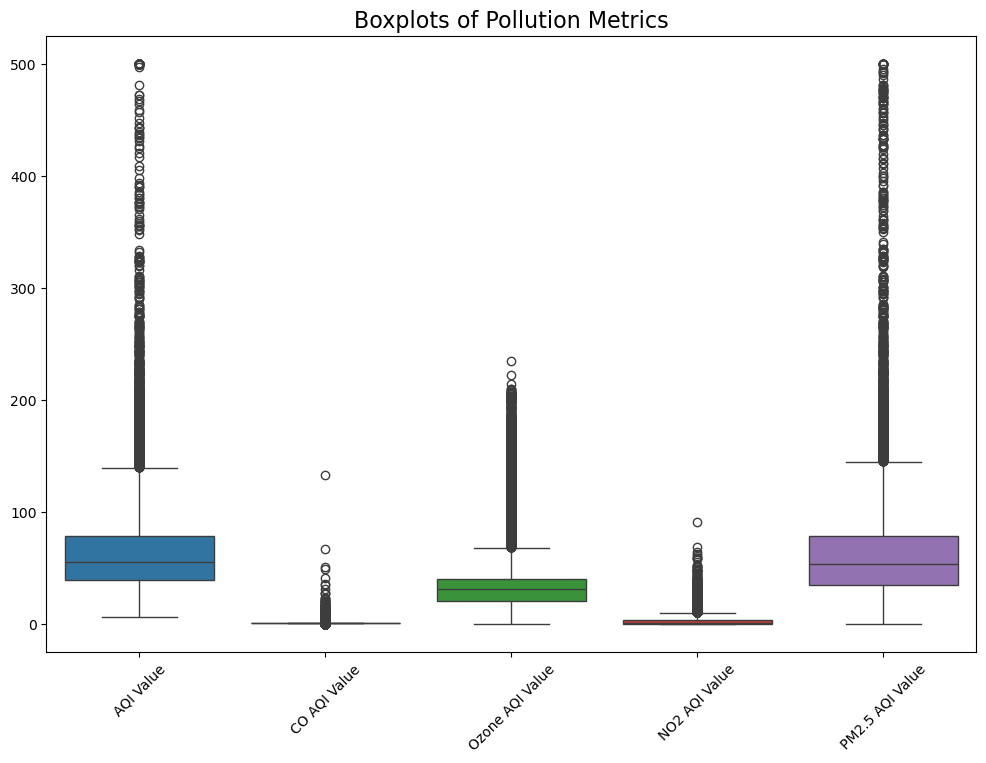

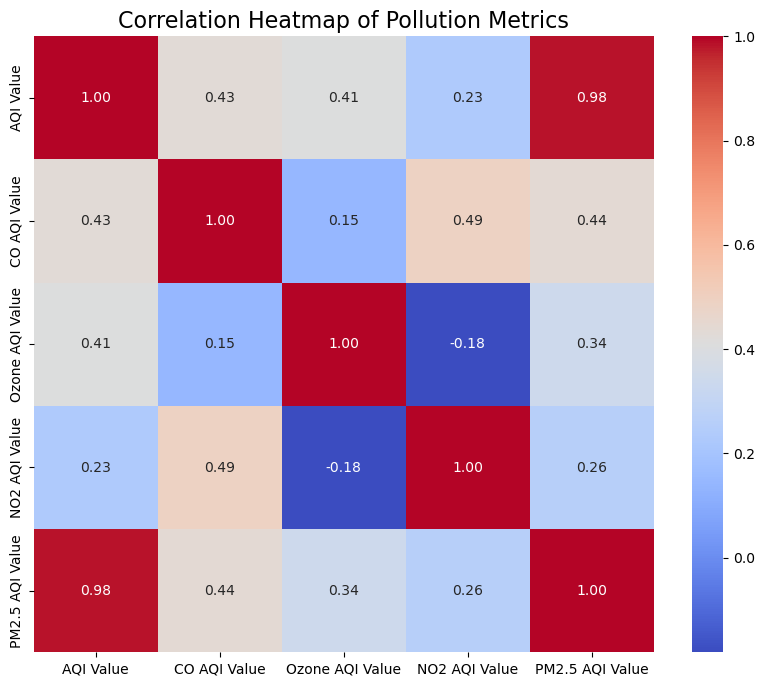

In [ ]:


# 1. Select numeric columns only
numeric_df = df_pollution.select_dtypes(include=['int64','float64'])

# 2. Histograms for numeric features
numeric_df.hist(bins=30, figsize=(15,10))
plt.suptitle("Distributions of Numeric Pollution Metrics", fontsize=16)
plt.show()

# 3. Boxplots for outlier detection
plt.figure(figsize=(12,8))
sns.boxplot(data=numeric_df)
plt.title("Boxplots of Pollution Metrics", fontsize=16)
plt.xticks(rotation=45)
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Pollution Metrics", fontsize=16)
plt.show()

# 5. Scatter plots for pollutant pairs
plt.figure(figsize=(8,6))
sns.scatterplot(x='NO2 AQI Value', y='PM2.5 AQI Value', data=df_pollution, hue='City')
plt.title("NO2 vs PM2.5 AQI Values by City")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='CO AQI Value', y='Ozone AQI Value', data=df_pollution, hue='City')
plt.title("CO vs Ozone AQI Values by City")
plt.show()


In [ ]:
Q1 = df['AQI Value'].quantile(0.25)
Q3 = df['AQI Value'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['AQI Value'] < (Q1 - 1.5 * IQR)) | (df['AQI Value'] > (Q3 + 1.5 * IQR)))]

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='NO2 AQI Value', y='PM2.5 AQI Value', data=df_pollution, hue='City')
plt.title("NO2 vs PM2.5 AQI Values by City")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='CO AQI Value', y='Ozone AQI Value', data=df_pollution, hue='City')
plt.title("CO vs Ozone AQI Values by City")
plt.show()